In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import logging
import os

logging.basicConfig(
    level=logging.INFO,
    format='%(asctime)s - %(levelname)s - %(message)s',
    handlers=[
        logging.FileHandler("001_2019_eda.log"), # Actualizado
        logging.StreamHandler()
    ]
)

logging.info("Inicio del notebook de EDA (001_2019_eda.ipynb).") # Actualizado

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

2025-05-18 20:08:57,663 - INFO - Inicio del notebook de EDA (001_2019_eda.ipynb).


In [51]:
# --- Definición de la ruta al archivo ---
file_path = "/home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2019.csv" # Actualizado

logging.info(f"Ruta del archivo a cargar: {file_path}")

df_2019 = None # Actualizado

try:
    logging.info(f"Intentando cargar el archivo CSV: {os.path.basename(file_path)}")
    # Revisar si 2019.csv tiene valores 'N/A' o similares que necesiten ser manejados.
    # Por ahora, asumimos una carga estándar. Si hay 'N/A', añadir na_values=['N/A']
    df_2019 = pd.read_csv(file_path) # Actualizado
    logging.info(f"Archivo {os.path.basename(file_path)} cargado exitosamente.")
    logging.info(f"El DataFrame tiene {df_2019.shape[0]} filas y {df_2019.shape[1]} columnas.") # Actualizado

except FileNotFoundError:
    logging.error(f"Error: El archivo no fue encontrado en la ruta especificada: {file_path}")
except pd.errors.EmptyDataError:
    logging.error(f"Error: El archivo {os.path.basename(file_path)} está vacío.")
except pd.errors.ParserError:
    logging.error(f"Error: No se pudo parsear el archivo {os.path.basename(file_path)}. Verifica el formato del CSV.")
except Exception as e:
    logging.error(f"Ocurrió un error inesperado al cargar {os.path.basename(file_path)}: {e}")

2025-05-18 20:08:57,675 - INFO - Ruta del archivo a cargar: /home/nicolas/Escritorio/workshops ETL/workshop_3/data/raw/2019.csv
2025-05-18 20:08:57,676 - INFO - Intentando cargar el archivo CSV: 2019.csv
2025-05-18 20:08:57,678 - INFO - Archivo 2019.csv cargado exitosamente.
2025-05-18 20:08:57,678 - INFO - El DataFrame tiene 156 filas y 9 columnas.


In [52]:
# --- Verificar si el DataFrame está cargado ---
if 'df_2019' in locals() and df_2019 is not None: # Actualizado
    logging.info("Mostrando las primeras 5 filas del DataFrame df_2019 en formato Markdown.")
    print("\nPrimeras 5 filas del DataFrame df_2019 (Markdown):")
    print(df_2019.head().to_markdown(index=False)) # Actualizado
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,685 - INFO - Mostrando las primeras 5 filas del DataFrame df_2019 en formato Markdown.



Primeras 5 filas del DataFrame df_2019 (Markdown):
|   Overall rank | Country or region   |   Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|---------------:|:--------------------|--------:|-----------------:|-----------------:|--------------------------:|-------------------------------:|-------------:|----------------------------:|
|              1 | Finland             |   7.769 |            1.34  |            1.587 |                     0.986 |                          0.596 |        0.153 |                       0.393 |
|              2 | Denmark             |   7.6   |            1.383 |            1.573 |                     0.996 |                          0.592 |        0.252 |                       0.41  |
|              3 | Norway              |   7.554 |            1.488 |            1.582 |                     1.028 |                          0.603 |        0.271 |    

In [53]:
# --- Obtener y mostrar la lista de columnas (df_2019) ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Obteniendo la lista de todas las columnas del DataFrame df_2019.")
    column_list_2019 = df_2019.columns.tolist()

    print("\nLista de columnas (df_2019):")
    for i, col in enumerate(column_list_2019):
        print(f"{i+1}. {col}")
    logging.info(f"El DataFrame df_2019 tiene {len(column_list_2019)} columnas.")
    logging.info(f"Nombres de las columnas (df_2019): {column_list_2019}")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,694 - INFO - Obteniendo la lista de todas las columnas del DataFrame df_2019.
2025-05-18 20:08:57,695 - INFO - El DataFrame df_2019 tiene 9 columnas.
2025-05-18 20:08:57,695 - INFO - Nombres de las columnas (df_2019): ['Overall rank', 'Country or region', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']



Lista de columnas (df_2019):
1. Overall rank
2. Country or region
3. Score
4. GDP per capita
5. Social support
6. Healthy life expectancy
7. Freedom to make life choices
8. Generosity
9. Perceptions of corruption


In [54]:
# --- Mostrar la lista de todos los países presentes en df_2019 ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Obteniendo la lista de todos los países en df_2019.")
    countries = df_2019['Country or region'].unique().tolist()
    print(f"Total de países: {len(countries)}")
    print(countries)
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,705 - INFO - Obteniendo la lista de todos los países en df_2019.


Total de países: 156
['Finland', 'Denmark', 'Norway', 'Iceland', 'Netherlands', 'Switzerland', 'Sweden', 'New Zealand', 'Canada', 'Austria', 'Australia', 'Costa Rica', 'Israel', 'Luxembourg', 'United Kingdom', 'Ireland', 'Germany', 'Belgium', 'United States', 'Czech Republic', 'United Arab Emirates', 'Malta', 'Mexico', 'France', 'Taiwan', 'Chile', 'Guatemala', 'Saudi Arabia', 'Qatar', 'Spain', 'Panama', 'Brazil', 'Uruguay', 'Singapore', 'El Salvador', 'Italy', 'Bahrain', 'Slovakia', 'Trinidad & Tobago', 'Poland', 'Uzbekistan', 'Lithuania', 'Colombia', 'Slovenia', 'Nicaragua', 'Kosovo', 'Argentina', 'Romania', 'Cyprus', 'Ecuador', 'Kuwait', 'Thailand', 'Latvia', 'South Korea', 'Estonia', 'Jamaica', 'Mauritius', 'Japan', 'Honduras', 'Kazakhstan', 'Bolivia', 'Hungary', 'Paraguay', 'Northern Cyprus', 'Peru', 'Portugal', 'Pakistan', 'Russia', 'Philippines', 'Serbia', 'Moldova', 'Libya', 'Montenegro', 'Tajikistan', 'Croatia', 'Hong Kong', 'Dominican Republic', 'Bosnia and Herzegovina', 'Turk

In [55]:
# --- Verificar si el DataFrame df_2019 tiene filas duplicadas ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Verificando la existencia de filas duplicadas en df_2019.")
    num_duplicated_rows_2019 = df_2019.duplicated().sum()

    if num_duplicated_rows_2019 > 0:
        logging.info(f"Se encontraron {num_duplicated_rows_2019} fila(s) duplicada(s) en df_2019.")
        print(f"\nEl DataFrame df_2019 contiene {num_duplicated_rows_2019} fila(s) duplicada(s).")
    else:
        logging.info("No se encontraron filas duplicadas en el DataFrame df_2019.")
        print("\nNo hay filas duplicadas en el DataFrame df_2019.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,717 - INFO - Verificando la existencia de filas duplicadas en df_2019.
2025-05-18 20:08:57,720 - INFO - No se encontraron filas duplicadas en el DataFrame df_2019.



No hay filas duplicadas en el DataFrame df_2019.


In [56]:
# --- Mostrar información general del DataFrame df_2019 (.info()) ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Mostrando información del DataFrame df_2019 (conteo de no nulos y tipos de datos).")
    print("\nInformación del DataFrame (df_2019):")
    df_2019.info()

    print("\nConteo de valores nulos por columna (df_2019):")
    null_counts_2019 = df_2019.isnull().sum()
    print(null_counts_2019[null_counts_2019 > 0].to_markdown() if null_counts_2019.sum() > 0 else "No hay valores nulos explícitos (NaN).")
    if null_counts_2019.sum() > 0:
        logging.info(f"Columnas con valores nulos y sus conteos (df_2019): {null_counts_2019[null_counts_2019 > 0].to_dict()}")
    else:
        logging.info("No se encontraron valores nulos explícitos (NaN) en el DataFrame df_2019.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,731 - INFO - Mostrando información del DataFrame df_2019 (conteo de no nulos y tipos de datos).
2025-05-18 20:08:57,739 - INFO - No se encontraron valores nulos explícitos (NaN) en el DataFrame df_2019.



Información del DataFrame (df_2019):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB

Conteo de valores nulos por columna (df_2019):
No hay valores nulos explícitos (NaN).


In [57]:
# --- Calcular y mostrar estadísticas descriptivas para columnas numéricas de df_2019 ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas numéricas de df_2019.")
    descriptive_stats_numeric_2019 = df_2019.describe()
    print("\nEstadísticas Descriptivas de las Columnas Numéricas (df_2019):")
    print(descriptive_stats_numeric_2019.to_markdown())
    logging.info("Estadísticas descriptivas numéricas de df_2019 calculadas y mostradas.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,747 - INFO - Calculando estadísticas descriptivas para las columnas numéricas de df_2019.
2025-05-18 20:08:57,761 - INFO - Estadísticas descriptivas numéricas de df_2019 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas Numéricas (df_2019):
|       |   Overall rank |     Score |   GDP per capita |   Social support |   Healthy life expectancy |   Freedom to make life choices |   Generosity |   Perceptions of corruption |
|:------|---------------:|----------:|-----------------:|-----------------:|--------------------------:|-------------------------------:|-------------:|----------------------------:|
| count |       156      | 156       |       156        |       156        |                156        |                     156        |  156         |                 156         |
| mean  |        78.5    |   5.4071  |         0.905147 |         1.20881  |                  0.725244 |                       0.392571 |    0.184846  |                   0.110603  |
| std   |        45.1774 |   1.11312 |         0.398389 |         0.299191 |                  0.242124 |                       0.143289 |    0.0952544 |                   0.0945378 |
| min   |         1  

In [58]:
# --- Calcular y mostrar estadísticas descriptivas para columnas de tipo 'object' de df_2019 ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2019.")
    object_columns_2019 = df_2019.select_dtypes(include=['object']).columns

    if not object_columns_2019.empty:
        descriptive_stats_object_2019 = df_2019[object_columns_2019].describe()
        print("\nEstadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2019):")
        print(descriptive_stats_object_2019.to_markdown())
        logging.info("Estadísticas descriptivas para columnas 'object' de df_2019 calculadas y mostradas.")
    else:
        logging.info("No se encontraron columnas de tipo 'object' en el DataFrame df_2019.")
        print("\nNo hay columnas de tipo 'object' para analizar en df_2019.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:57,772 - INFO - Calculando estadísticas descriptivas para las columnas de tipo 'object' de df_2019.
2025-05-18 20:08:57,777 - INFO - Estadísticas descriptivas para columnas 'object' de df_2019 calculadas y mostradas.



Estadísticas Descriptivas de las Columnas de Tipo 'Object' (df_2019):
|        | Country or region   |
|:-------|:--------------------|
| count  | 156                 |
| unique | 156                 |
| top    | Finland             |
| freq   | 1                   |


2025-05-18 20:08:57,790 - INFO - Iniciando el cálculo de la correlación gráfica para df_2019.
2025-05-18 20:08:57,792 - INFO - Columnas numéricas identificadas en df_2019: ['Overall rank', 'Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2025-05-18 20:08:57,793 - INFO - Columnas a excluir del heatmap de correlación de features (df_2019): ['Overall rank']
2025-05-18 20:08:57,794 - INFO - Columnas seleccionadas para el heatmap de correlación de features (df_2019): ['Score', 'GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
2025-05-18 20:08:57,796 - INFO - Matriz de correlación de features calculada para df_2019.


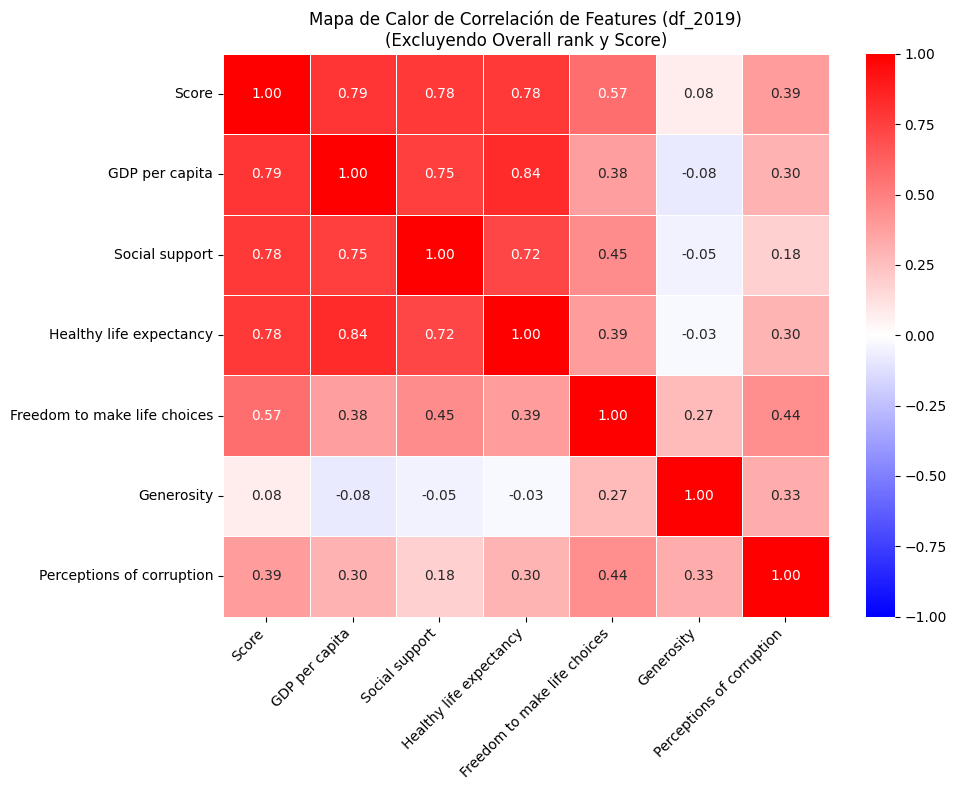

2025-05-18 20:08:58,060 - INFO - Mapa de calor de correlación de features generado y mostrado para df_2019.
2025-05-18 20:08:58,062 - INFO - Correlación de features con 'Score' (df_2019) calculada y mostrada.



Correlación de features con 'Score' (df_2019):
|                              |     Score |
|:-----------------------------|----------:|
| GDP per capita               | 0.793883  |
| Healthy life expectancy      | 0.779883  |
| Social support               | 0.777058  |
| Freedom to make life choices | 0.566742  |
| Perceptions of corruption    | 0.385613  |
| Generosity                   | 0.0758237 |


In [59]:
# --- Generar y visualizar la matriz de correlación (Heatmap) para df_2019 ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Iniciando el cálculo de la correlación gráfica para df_2019.")

    numeric_cols_2019 = df_2019.select_dtypes(include=np.number).columns.tolist()
    logging.info(f"Columnas numéricas identificadas en df_2019: {numeric_cols_2019}")

    cols_to_exclude_heatmap_2019 = ['Overall rank']
    actual_cols_to_exclude_2019 = [col for col in cols_to_exclude_heatmap_2019 if col in numeric_cols_2019]
    logging.info(f"Columnas a excluir del heatmap de correlación de features (df_2019): {actual_cols_to_exclude_2019}")

    cols_for_correlation_2019 = [col for col in numeric_cols_2019 if col not in actual_cols_to_exclude_2019]

    if not cols_for_correlation_2019:
        logging.warning("No quedan columnas numéricas para el análisis de correlación de features después de la exclusión en df_2019.")
        print("\nNo hay columnas numéricas suficientes para el heatmap de correlación de features en df_2019.")
    else:
        logging.info(f"Columnas seleccionadas para el heatmap de correlación de features (df_2019): {cols_for_correlation_2019}")
        df_correlation_subset_2019 = df_2019[cols_for_correlation_2019]
        correlation_matrix_2019 = df_correlation_subset_2019.corr()
        logging.info("Matriz de correlación de features calculada para df_2019.")

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix_2019, annot=True, cmap='bwr', fmt=".2f", linewidths=.5, vmin=-1, vmax=1, center=0)
        plt.title('Mapa de Calor de Correlación de Features (df_2019)\n(Excluyendo Overall rank y Score)')
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
        logging.info("Mapa de calor de correlación de features generado y mostrado para df_2019.")

    if 'Score' in numeric_cols_2019 and cols_for_correlation_2019:
        print("\nCorrelación de features con 'Score' (df_2019):")
        cols_for_target_correlation_2019 = cols_for_correlation_2019 + ['Score']
        cols_for_target_correlation_2019 = list(dict.fromkeys(cols_for_target_correlation_2019))

        if 'Score' in cols_for_target_correlation_2019:
            correlation_with_score_2019 = df_2019[cols_for_target_correlation_2019].corr()['Score'].drop('Score').sort_values(ascending=False)
            print(correlation_with_score_2019.to_markdown())
            logging.info("Correlación de features con 'Score' (df_2019) calculada y mostrada.")
        else:
            logging.warning("'Score' no está en las columnas para correlación con el target (df_2019).")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:58,071 - INFO - Generando matriz de histogramas/KDE para variables numéricas clave de df_2019 usando paleta 'viridis'.


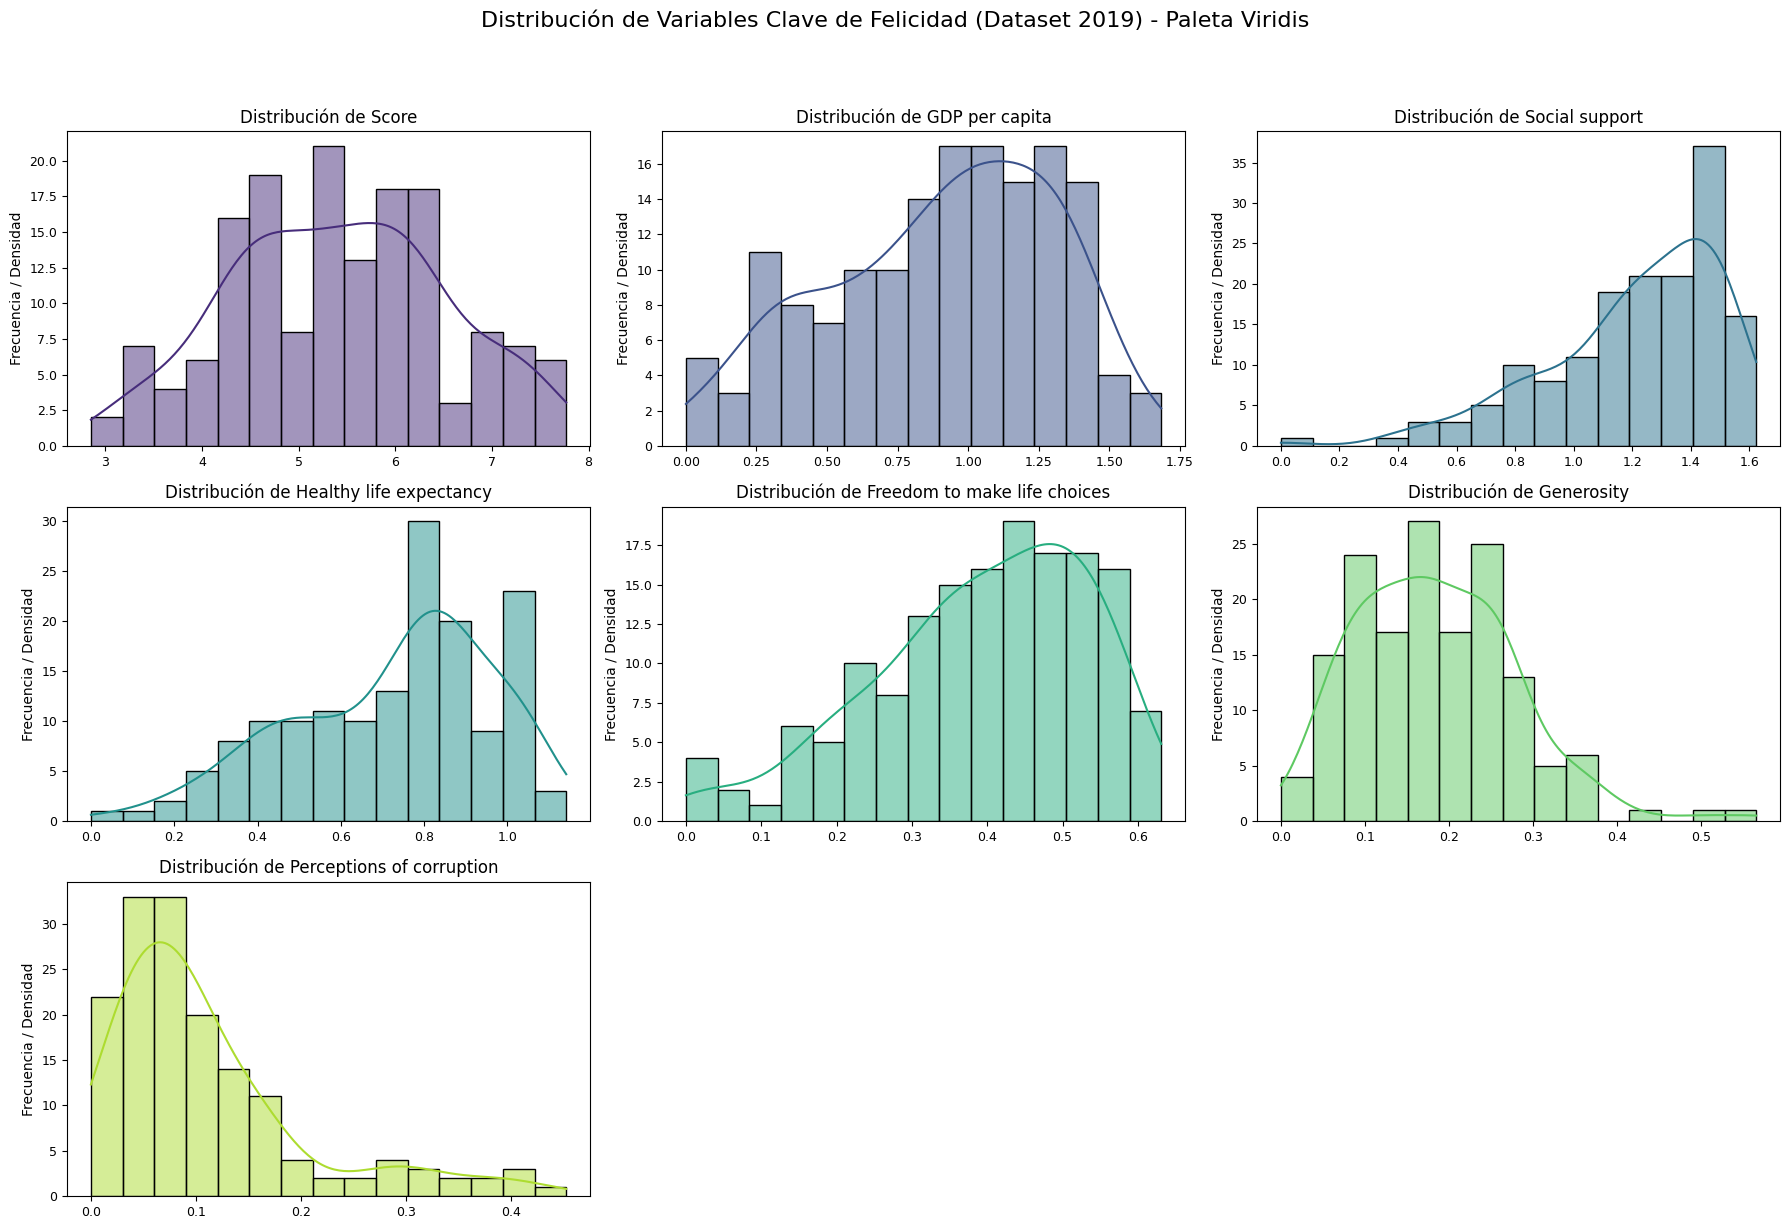

2025-05-18 20:08:58,947 - INFO - Matriz de histogramas/KDE generada y mostrada para df_2019 con paleta 'viridis'.


In [60]:
# --- Distribuciones de Variables Numéricas (Histogramas/KDE) para df_2019 ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Generando matriz de histogramas/KDE para variables numéricas clave de df_2019 usando paleta 'viridis'.")

    cols_for_hist_2019 = [
        'Score',
        'GDP per capita',
        'Social support',
        'Healthy life expectancy',
        'Freedom to make life choices',
        'Generosity',
        'Perceptions of corruption'
    ]
    actual_cols_for_hist_2019 = [col for col in cols_for_hist_2019 if col in df_2019.columns]

    if not actual_cols_for_hist_2019:
        logging.warning("No hay columnas seleccionadas para generar histogramas/KDE para df_2019.")
        print("\nNo hay columnas seleccionadas para generar histogramas/KDE para df_2019.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2019) + n_cols_plot - 1) // n_cols_plot

        # Obtener una lista de colores de la paleta 'viridis'
        # Suficientes colores para el número de plots que vamos a hacer
        viridis_colors = sns.color_palette("viridis", n_colors=len(actual_cols_for_hist_2019))

        plt.figure(figsize=(18, n_rows_plot * 4))
        # Actualizar el título para reflejar la paleta si es relevante para ti
        plt.suptitle('Distribución de Variables Clave de Felicidad (Dataset 2019) - Paleta Viridis', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist_2019):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            # Usar el color correspondiente de la lista viridis_colors
            sns.histplot(df_2019[col].dropna(), kde=True, bins=15, color=viridis_colors[i]) # .dropna() por si 'Perceptions of corruption' tiene NaNs
            plt.title(f'Distribución de {col}', fontsize=12)
            plt.xlabel('')
            plt.ylabel('Frecuencia / Densidad', fontsize=10)
            plt.xticks(fontsize=9)
            plt.yticks(fontsize=9)

        # Ocultar ejes no utilizados
        for j in range(len(actual_cols_for_hist_2019), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Matriz de histogramas/KDE generada y mostrada para df_2019 con paleta 'viridis'.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")

2025-05-18 20:08:58,957 - INFO - Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2019.


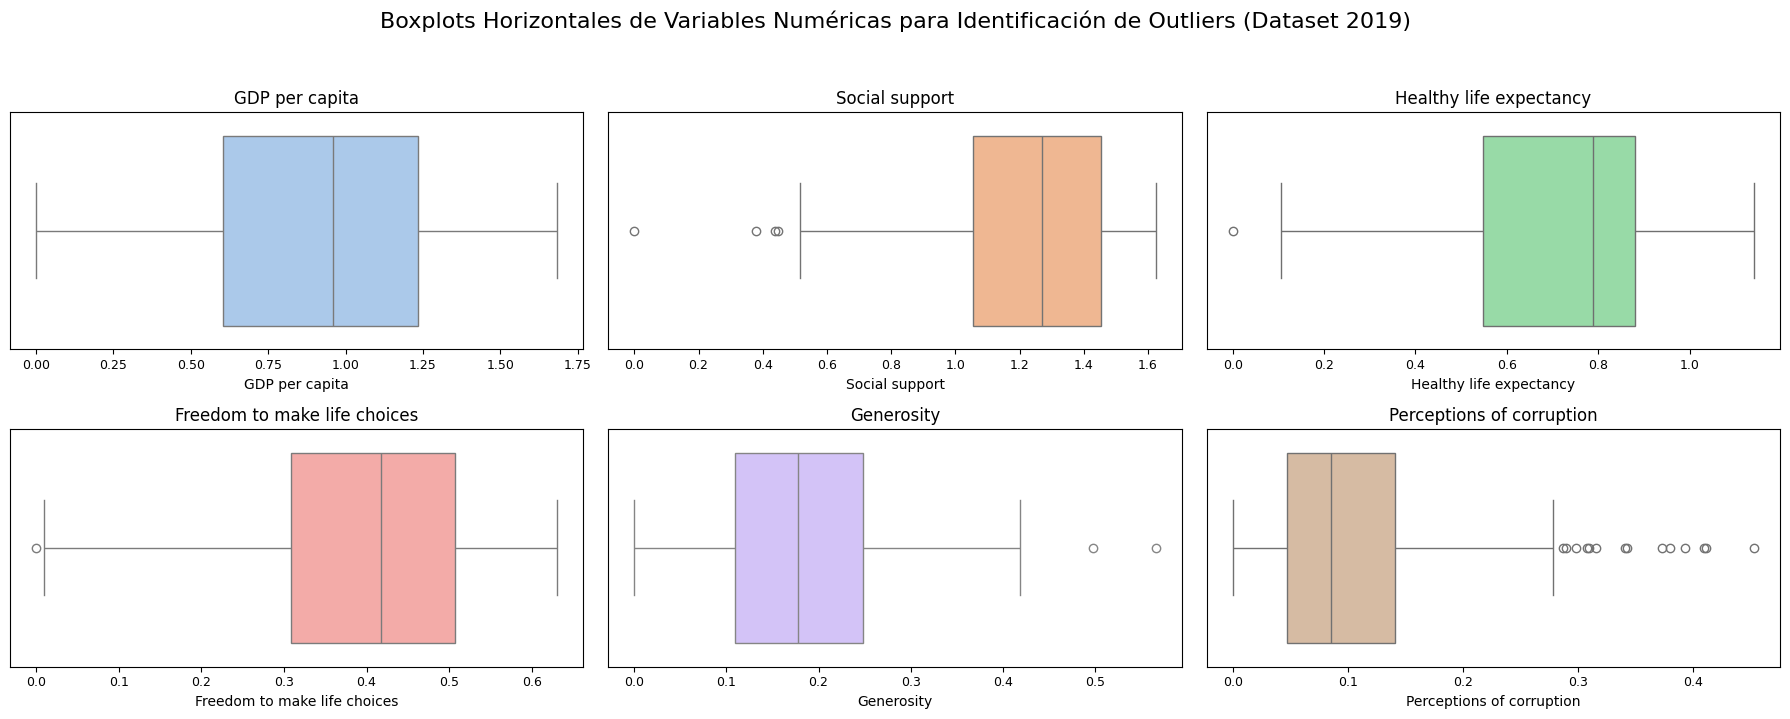

2025-05-18 20:08:59,320 - INFO - Boxplots horizontales generales generados y mostrados para df_2019.


In [61]:
# --- Boxplots Horizontales para Identificación de Outliers Generales (df_2019) ---
if 'df_2019' in locals() and df_2019 is not None:
    logging.info("Generando boxplots horizontales para identificar outliers generales en variables numéricas de df_2019.")

    actual_cols_for_hist_2019 = [col for col in cols_for_hist_2019 if col !='Score']

    if not actual_cols_for_hist_2019:
        logging.warning("No hay columnas seleccionadas para generar boxplots generales para df_2019.")
        print("\nNo hay columnas seleccionadas para generar boxplots generales para df_2019.")
    else:
        n_cols_plot = 3
        n_rows_plot = (len(actual_cols_for_hist_2019) + n_cols_plot - 1) // n_cols_plot

        plt.figure(figsize=(18, n_rows_plot * 3.5))
        plt.suptitle('Boxplots Horizontales de Variables Numéricas para Identificación de Outliers (Dataset 2019)', fontsize=16, y=1.02)

        for i, col in enumerate(actual_cols_for_hist_2019):
            plt.subplot(n_rows_plot, n_cols_plot, i + 1)
            sns.boxplot(x=df_2019[col].dropna(), color=sns.color_palette("pastel")[i % len(sns.color_palette("pastel"))], orient='h') # .dropna() por si 'Perceptions of corruption' tiene NaNs
            plt.title(col, fontsize=12)
            plt.xlabel(col, fontsize=10)
            plt.ylabel('')
            plt.xticks(fontsize=9)
            plt.yticks([])

        for j in range(len(actual_cols_for_hist_2019), n_rows_plot * n_cols_plot):
            plt.subplot(n_rows_plot, n_cols_plot, j + 1).set_visible(False)

        plt.tight_layout(rect=[0, 0, 1, 0.98])
        plt.show()
        logging.info("Boxplots horizontales generales generados y mostrados para df_2019.")
else:
    logging.error("El DataFrame df_2019 no está cargado. Por favor, ejecuta la celda de carga primero.")